In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
import warnings

# Suppress FutureWarnings related to is_sparse deprecation
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

In [5]:
data=pd.read_excel("hr_dataset.xlsx")

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.shape

(14999, 10)

1- Perform data quality check by checking for missing values if any. 


In [9]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is not any missing values in dataset

In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
numeric_columns=data.select_dtypes(include='number')
non_numeric_columns = data.select_dtypes(exclude='number')


2-1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data. 

2-2 Draw the distribution plot of  

    Employee Satisfaction (use column satisfaction_level) 

    Employee Evaluation (use column last_evaluation) 

    Employee Average Monthly Hours (use column average_montly_hours) 

In [12]:
#correlation matrix
correlation_matrix=numeric_columns.corr()

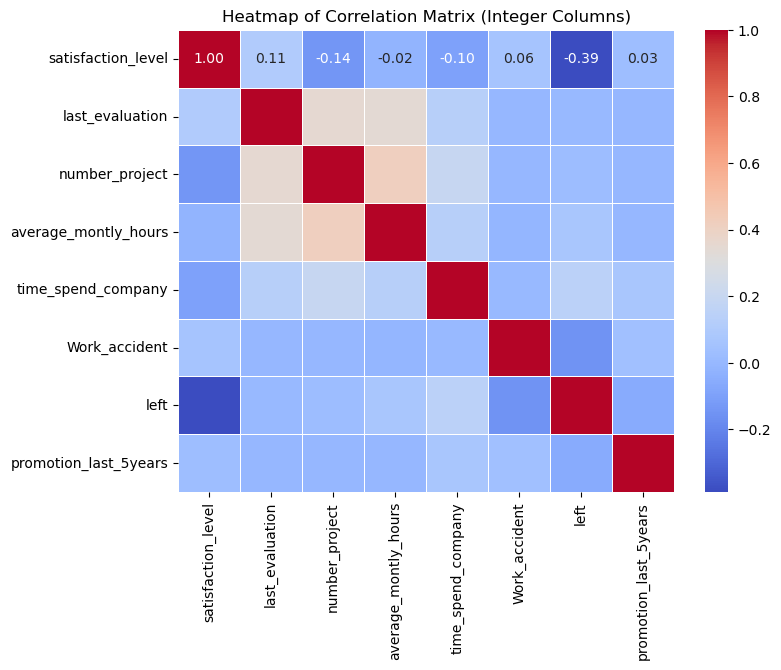

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Integer Columns)')
plt.show()

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisfaction_level', ylabel='Count'>

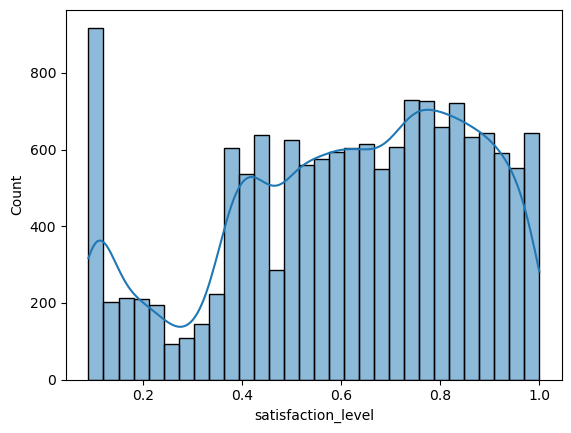

In [11]:
sns.histplot(data=data, x="satisfaction_level", kde=True)

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='last_evaluation', ylabel='Count'>

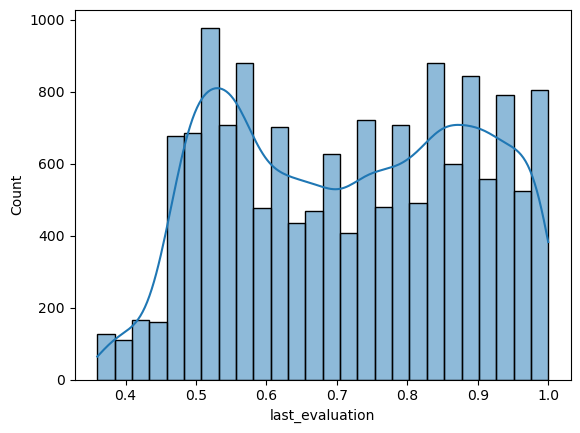

In [12]:
sns.histplot(data=data, x="last_evaluation", kde=True)

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_montly_hours', ylabel='Count'>

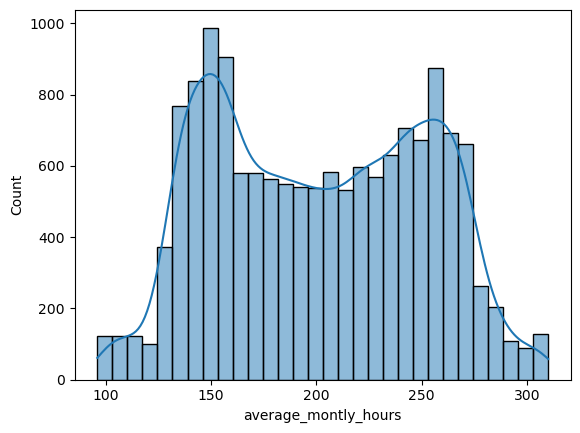

In [13]:
sns.histplot(data=data, x="average_montly_hours", kde=True)

2-3 Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot. 

In [14]:
data_number_project = pd.DataFrame(data[data["left"] == 0].groupby('number_project')["number_project"].count())
data_number_project

,number_project
number_project,
2,821
3,3983
4,3956
5,2149
6,519


In [15]:
data_number_project.columns = [ 'count_left']
data_number_project

,count_left
number_project,
2,821
3,3983
4,3956
5,2149
6,519


In [16]:
# Reset index to get 'number_project' as a regular column
data_number_project = data_number_project.reset_index()

In [17]:
data_number_project

,number_project,count_left
0,2,821
1,3,3983
2,4,3956
3,5,2149
4,6,519


In [18]:
data_number_project_left = pd.DataFrame(data[data["left"] == 1].groupby('number_project')["number_project"].count())
data_number_project_left["number_project"]

number_project
2    1567
3      72
4     409
5     612
6     655
7     256
Name: number_project, dtype: int64

In [19]:
data_number_project_left.columns = [ 'count_left']
data_number_project_left

,count_left
number_project,
2,1567
3,72
4,409
5,612
6,655
7,256


In [20]:
# Reset index to get 'number_project' as a regular column
data_number_project_left = data_number_project_left.reset_index()

In [21]:
data_number_project_left

,number_project,count_left
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


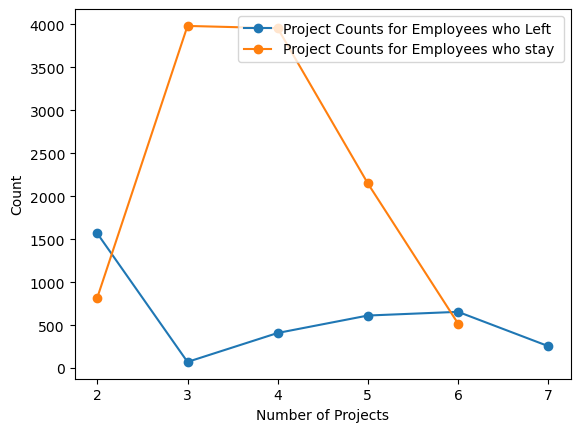

In [22]:
plt.plot(data_number_project_left['number_project'], data_number_project_left['count_left'],label='Project Counts for Employees who Left', marker='o')
plt.plot(data_number_project['number_project'], data_number_project['count_left'],label='Project Counts for Employees who stay ', marker='o')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend()
# plt.title('Project Counts for Employees who Left')
plt.show()

From the orange graph I undrestanf the people who do more than 5 projects they leave the company because of heavy load.
From the blue graph, if the number of projects will 2 then, the probability that employee left the company is high, since they might not envolve in the projects and they feel unusefullness.

3-1 Choose columns satisfaction_level, last_evaluation and left. 

3-2 Do KMeans clustering of employees who left the company into 3 clusters. 

3-3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters. 

In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [24]:
data_clustering_left=data[data["left"]==1]
data_clustering_left=data_clustering_left[["satisfaction_level", "last_evaluation","left"]]


In [25]:
data_clustering_left

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [26]:
#training
data_clustering_left.drop("left", axis=1, inplace=True)
kmeans.fit(data_clustering_left)

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
data_clustering_left

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [28]:
y_pred=kmeans.predict(data_clustering_left)

In [29]:
y_pred

array([2, 1, 0, ..., 2, 0, 2], dtype=int32)

In [30]:
kmeans.cluster_centers_

array([[0.11115466, 0.86930085],
       [0.80851586, 0.91170931],
       [0.41014545, 0.51698182]])

In [31]:
# determine number of data points in each cluster
pred_df=pd.DataFrame(y_pred.tolist())

In [32]:
pred_df.value_counts()

2    1650
1     977
0     944
Name: count, dtype: int64

In [33]:
data_clustering_left['cluster_number']=y_pred

In [34]:
data_clustering_left.head(50)

,satisfaction_level,last_evaluation,cluster_number
0,0.38,0.53,2
1,0.80,0.86,1
2,0.11,0.88,0
3,0.72,0.87,1
4,0.37,0.52,2
5,0.41,0.50,2
6,0.10,0.77,0
7,0.92,0.85,1
8,0.89,1.00,1
9,0.42,0.53,2


based on this clustering:  
people who have very high last_evaluation and satisfaction_level are in cluster number 1
people who have medium last_evaluation and satisfaction_level are in one cluster number 2
people who have  high last_evaluation and  low satisfaction_level are in one cluster number 0

4-1 Pre-Process the data by converting categorical columns to numerical columns by 

    Separating categorical variables and numeric variables. 

    Applying get_dummies() to the categorical variables. 

    Combining categorical variables and numeric variables. 

In [35]:
numeric_columns=data.select_dtypes(include='number')
non_numeric_columns = data.select_dtypes(exclude='number')

In [36]:
data=pd.get_dummies(data, columns=["salary"], prefix="salary", dtype=int)
data=pd.get_dummies(data, columns=["sales"], prefix="sales", dtype=int)

In [37]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y=data["left"]
X=data.drop("left", axis=1)


4-2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123. 

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [40]:
X_train.shape

(11999, 20)

In [41]:
y_train.shape

(11999,)

In [42]:
X_test.shape

(3000, 20)

In [43]:
from imblearn.over_sampling import SMOTE


In [44]:
import sklearn
print(sklearn.__version__)

1.2.2


In [45]:
import imblearn
print(imblearn.__version__)

0.11.0


4-3 Upsample the train dataset using SMOTE technique from the imblearn module. 

In [46]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=123)

In [47]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [48]:
X_train_resampled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.310000,0.640000,6,183,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.590000,0.810000,4,200,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.380000,0.510000,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.950000,0.770000,5,199,10,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.500000,0.770000,3,265,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18269,0.379912,0.509736,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18270,0.390000,0.550551,2,127,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18271,0.787858,0.987582,5,241,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
18272,0.430000,0.476603,2,136,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [49]:
y_train_resampled

0        0
1        0
2        1
3        0
4        0
        ..
18269    1
18270    1
18271    1
18272    1
18273    1
Name: left, Length: 18274, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


5-1 Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report. 

In [51]:
# Train a logistic regression model
logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(X_train_resampled, y_train_resampled)

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [69]:
# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

In [85]:
y_pred_lg

array([0, 0, 0, ..., 1, 0, 0])

In [111]:
# calculate probabilites on X_test
pred_prob_lg=logreg_model.predict_proba(X_test)
roc_auc_score_lg=roc_auc_score(y_test,pred_prob_lg[:,1])
fpr_lg,tpr_lg,thresh_lg=roc_curve(y_test,pred_prob_lg[:,1])

In [84]:
pred_prob_lg

array([[0.94958055, 0.05041945],
       [0.968659  , 0.031341  ],
       [0.93524056, 0.06475944],
       ...,
       [0.47156156, 0.52843844],
       [0.64440762, 0.35559238],
       [0.74714663, 0.25285337]])

In [107]:
roc_auc_score_lg

0.8222707485413887

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lg)
classification_report_str = classification_report(y_test, y_pred)


In [72]:

print('\nClassification Report for logistic regression:\n', classification_report_str)



Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      2291
           1       0.52      0.75      0.61       709

    accuracy                           0.78      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.82      0.78      0.79      3000



In [73]:
from sklearn.model_selection import cross_val_score, KFold

In [56]:
# Perform k-fold cross-validation
mse_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=5)

/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/soodeh/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [57]:
print('Accuracy: {:0.2f} %'.format(mse_scores.mean()*100))

Accuracy: 79.61 %


5-2 Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report. 

In [58]:
# apply decision tree classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

RF_classifier=RandomForestClassifier()

In [59]:

param_grid={'max_depth':[2,3,4,5],
           'max_features':[1,3,5,10],
           'min_samples_split':[2,3,5,10],
             'criterion':['gini','entropy'],
           'min_samples_leaf':[1,2,3,4]}

In [60]:
# run grid search
random_search=RandomizedSearchCV(RF_classifier,param_distributions=param_grid,cv=5, scoring='accuracy')
random_search.fit(X_train_resampled,y_train_resampled)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': [1, 3, 5, 10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 5, 10]},
                   scoring='accuracy')

In [61]:
random_search.best_params_



{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 10,
 'max_depth': 5,
 'criterion': 'entropy'}

In [62]:
best_model=random_search.best_estimator_

In [63]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=4, min_samples_split=3)

In [64]:
best_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=4, min_samples_split=3)

In [65]:
y_pred_RF=best_model.predict(X_test)

In [87]:
pred_prob_rf=best_model.predict_proba(X_test)
pred_prob_rf

array([[0.96436869, 0.03563131],
       [0.91387901, 0.08612099],
       [0.98054731, 0.01945269],
       ...,
       [0.08925317, 0.91074683],
       [0.96133578, 0.03866422],
       [0.96122148, 0.03877852]])

In [115]:
roc_auc_score_rf=roc_auc_score(y_test,pred_prob_rf[:,1])
print(roc_auc_score_rf)
fpr_rf,tpr_rf,tresh_rf=roc_curve(y_test,pred_prob_rf[:,1])

0.9866063870458943


In [66]:
classification_report_str_RF = classification_report(y_test, y_pred_RF)
print('\nClassification Report for classification:\n', classification_report_str_RF)



Classification Report for classification:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.94      0.92      0.93       709

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



5-3 Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report. 

In [89]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

gb_classifier = GradientBoostingClassifier()

gb_accuracy = cross_val_score(estimator=gb_classifier,X=X_train_resampled,y=y_train_resampled,cv=5)

# Use cross_val_predict to get predicted probabilities
y_pred_proba_gb = cross_val_predict(gb_classifier, X_train_resampled, y_train_resampled, cv=5, method='predict_proba')

gb_mean_accuracy=gb_accuracy.mean()
# gb_accuracy = accuracy_score(y_test, y_pred_gb)

# mean_accuracy=gb_accuracies.mean()
print('\nClassification Report for classification:\n', gb_mean_accuracy)




Classification Report for classification:
 0.9608187717749489


6-1 Find the ROC/AUC for each model and plot the ROC curve. 

6-2 Find the confusion matrix for each of the models. 

6-3 From the confusion matrix, explain which metric needs to be used- Recall or Precision? 

In [102]:
# Use the probabilities for the positive class (1)
roc_auc_score_gb = roc_auc_score(y_train_resampled, y_pred_proba_gb[:, 1])  
print(roc_auc_score_gb)

0.9917083797644574


In [100]:

from sklearn.metrics import roc_curve
fpr_gb,tpr_gb,thresh_gb=roc_curve(y_train_resampled,y_pred_proba_gb[:,1])

In [97]:
thresh_gb

array([1.99883779e+00, 9.98837791e-01, 9.98375866e-01, ...,
       9.91316868e-04, 9.74352268e-04, 5.58603626e-04])

In [98]:
thresh_gb.shape

(3760,)

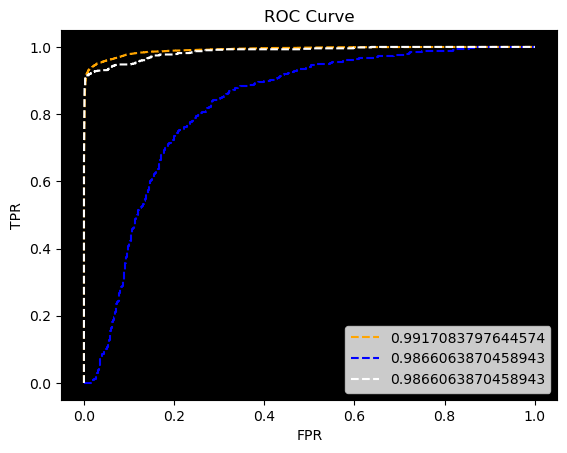

In [116]:
# plot the ROC Curve
fig,ax=plt.subplots()
ax.set_facecolor('black')
#plt.style.use('lightgray')
plt.plot(fpr_gb,tpr_gb,linestyle='--',color='orange',label=roc_auc_score_gb)
plt.plot(fpr_lg,tpr_lg,linestyle='--',color='blue',label=roc_auc_score_lg)
plt.plot(fpr_rf,tpr_rf,linestyle='--',color='white',label=roc_auc_score_rf)

plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

from the confusion matric and roc curve we figure out that the random forest and gradient boost has high AUC.

we need to use both precision and recall wich means we have to decide beased on the f1-score in order to compare them.

7.Using the best model, predict the probability of employee turnover in the test data. 

basded on the predict_prob and auc score, the gradient boost is most accurate